In [1]:
%pylab inline
import numpy as np

from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from keras.metrics import mean_squared_error
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import GridSearchCV

from IPython.display import SVG, Image
from keras.utils.vis_utils import model_to_dot

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


# DATA

x: (140, 200, 1)
y: (140, 200, 1)


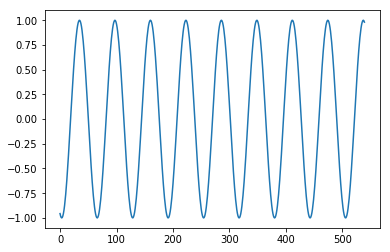

In [2]:
SIZE = 200

data = np.arange(-27, 27, 0.1)
data = np.sin(data)

def make_x_y(data, size=500):
    N = data.shape[0]
    
    data_x = np.zeros((N-size*2, size))
    data_y = np.zeros((N-size*2, size))
    for i, idx in enumerate(range(0, N-size*2)):
        x = data[idx: idx+size]
        y = data[idx+size: idx+size*2]
        
        data_x[idx, :x.shape[0]] = x
        data_y[idx, :y.shape[0]] = y
        
    data_x = np.asarray(data_x)
    data_y = np.asarray(data_y)
    
    data_x = data_x.reshape(-1, size, 1)
    data_y = data_y.reshape(-1, size, 1)
    
    # Shuffle
    permu = np.random.permutation(data_x.shape[0])
    data_x = data_x[permu]
    data_y = data_y[permu]
    return data_x, data_y


x, y = make_x_y(data, size=SIZE)
print('x:', x.shape)
print('y:', y.shape)

plot(data)

## Visualize Data

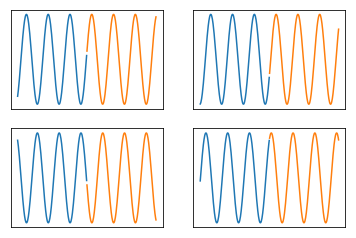

In [3]:
def visualize(data_x, data_y):
    fig, sub_plots = subplots(2, 2)
    for columns in sub_plots:
        for sp in columns:
            sp.get_xaxis().set_visible(False)
            sp.get_yaxis().set_visible(False)
            
            
            r = np.random.randint(data_x.shape[0])
            sample_x = data_x[r]
            sample_y = data_y[r]
            
            
            sample_x = sample_x.reshape(sample_x.shape[0])
            sample_y = sample_y.reshape(sample_y.shape[0])
            tick_x = range(0, SIZE)
            tick_y = range(SIZE, SIZE*2)
            
            sp.plot(tick_x, sample_x)
            sp.plot(tick_y, sample_y)

visualize(x, y)

# RNN

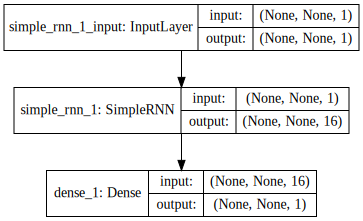

In [4]:
def create_model(lstm_out=10, optimizer='adam'):
    model = Sequential(name='lstm')
    model.add(SimpleRNN(units=16, batch_input_shape=(None, None, 1), return_sequences=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=[mean_squared_error])
    return model

model = create_model()
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

# Train

In [5]:
model.fit(x, y, verbose=2, nb_epoch=100)

/usr/local/lib/python3.6/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/100
 - 1s - loss: 0.3702 - mean_squared_error: 0.3702
Epoch 2/100
 - 0s - loss: 0.3294 - mean_squared_error: 0.3294
Epoch 3/100
 - 0s - loss: 0.2860 - mean_squared_error: 0.2860
Epoch 4/100
 - 0s - loss: 0.2373 - mean_squared_error: 0.2373
Epoch 5/100
 - 0s - loss: 0.1853 - mean_squared_error: 0.1853
Epoch 6/100
 - 0s - loss: 0.1326 - mean_squared_error: 0.1326
Epoch 7/100
 - 0s - loss: 0.0860 - mean_squared_error: 0.0860
Epoch 8/100
 - 0s - loss: 0.0510 - mean_squared_error: 0.0510
Epoch 9/100
 - 0s - loss: 0.0315 - mean_squared_error: 0.0315
Epoch 10/100
 - 0s - loss: 0.0258 - mean_squared_error: 0.0258
Epoch 11/100
 - 0s - loss: 0.0268 - mean_squared_error: 0.0268
Epoch 12/100
 - 0s - loss: 0.0275 - mean_squared_error: 0.0275
Epoch 13/100
 - 0s - loss: 0.0259 - mean_squared_error: 0.0259
Epoch 14/100
 - 0s - loss: 0.0237 - mean_squared_error: 0.0237
Epoch 15/100
 - 0s - loss: 0.0223 - mean_squared_error: 0.0223
Epoch 16/100
 - 0s - loss: 0.0219 - mean_squared_error: 0.0219
E

mse: 0.016
r^2: 0.97


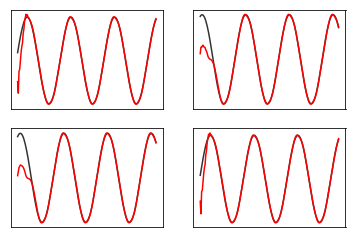

In [7]:
def accuracy(y_true, y_pred):
    y_true = y_true.reshape((-1, SIZE))
    y_pred = y_pred.reshape((-1, SIZE))
    score = r2_score(y_true, y_pred, multioutput='variance_weighted')
    error = ((y_true - y_pred)**2).mean()
    print(f'mse: {error:.2}')
    print(f'r^2: {score:.2}')
    return score

def visualize_prediction(data_x, data_y):
    data_p = model.predict(data_x)
    data_x = data_x.reshape((-1, SIZE))
    data_y = data_y.reshape((-1, SIZE))
    data_p = data_p.reshape((-1, SIZE))
    accuracy(data_y, data_p)
        
    fig, sub_plots = subplots(2, 2)
    for col_plots in sub_plots:
        for sp in col_plots:
            sp.get_xaxis().set_visible(False)
            sp.get_yaxis().set_visible(False)
        
            idx = np.random.randint(data_x.shape[0])
            
            sp.plot(data_y[idx], color='#333333')
            sp.plot(data_p[idx], color='red')


visualize_prediction(x, y)